In [1]:
import pandas as pd			              	#Pandas 라이브러리를 pd 라는 이름으로 가져오기

df = pd.read_csv ('./subway.csv', encoding='utf-8')    #pd에 있는 read_csv()함수로 .csv 파일 읽기

In [2]:
print(df)

           date line     station     In    Out
0      20221001  3호선       고속터미널  59124  62989
1      20221001  3호선  교대(법원.검찰청)   8040   4875
2      20221001  3호선         학여울   3355   3401
3      20221001  3호선          대청   6517   5926
4      20221001  3호선          일원   6231   6025
...         ...  ...         ...    ...    ...
18780  20221031  6호선        버티고개   2366   2239
18781  20221031  6호선          약수   3778   3751
18782  20221031  6호선          청구   3842   4067
18783  20221031  6호선          신당   8136   8814
18784  20221031  6호선         동묘앞   8434   8751

[18785 rows x 5 columns]


In [3]:
df['line'].unique()

array(['3호선', '4호선', '5호선', '9호선', '경춘선', '8호선', '경인선', '경의선', '9호선2~3단계',
       '6호선', '2호선', '1호선', '분당선', '과천선', '공항철도 1호선', '경원선', '경부선', '수인선',
       '신림선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '경강선', '7호선'],
      dtype=object)

In [4]:
filter = df['line'].str.endswith('호선') & ~df['line'].str.contains('공항철도')
df = df[filter]

df['line'].unique()

array(['3호선', '4호선', '5호선', '9호선', '8호선', '6호선', '2호선', '1호선', '7호선'],
      dtype=object)

In [5]:
df.groupby('line').mean()

,date,In,Out
line,,,
1호선,2.022102e+07,22743.958065,22271.164516
2호선,2.022102e+07,25614.591613,25982.654194
3호선,2.022102e+07,14737.277778,14774.023946
4호선,2.022102e+07,18113.727047,18380.393300
5호선,2.022102e+07,10680.313940,10631.481567
6호선,2.022102e+07,8626.045957,8544.159149
7호선,2.022102e+07,13003.898240,12760.013007
8호선,2.022102e+07,9709.612903,9771.345878
9호선,2.022102e+07,10315.569032,10407.489032


In [6]:
df.groupby(['line']).sum()

,date,In,Out
line,,,
1호선,6268514960,7050627,6904061
2호선,31342574800,39702617,40273114
3호선,21110740699,15385718,15424081
4호선,16298138896,14599664,14814597
5호선,35103683776,18541025,18456252
6호선,23759693825,10135604,10039387
7호선,26428867919,16996095,16677337
8호선,11283326928,5417964,5452411
9호선,15671287400,7994566,8065804


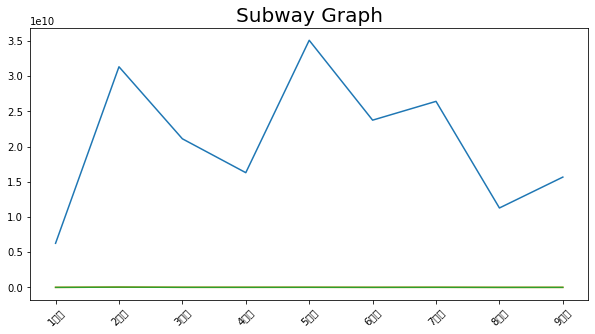

In [9]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(10,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
sss = df.groupby(['line']).sum() 
ax.plot(sss) ## 선그래프 생성
 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('Subway Graph',fontsize=20) ## 타이틀 설정
plt.show()